In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D 

plt.style.use('seaborn')

## Exercise 1
Train a LinearSVC on a linearly separable dataset, Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model

## A) An easy linearly separable dataset

Let's start by creating a linearly separable dataset

In [5]:
def rand_circle(x0, y0, circle_r,  n_samples=1000):
    xs, ys = [], []
    while len(xs) < n_samples:
        alpha = 2 * math.pi * np.random.rand() 
        r = circle_r * math.sqrt(np.random.rand())
        x = r * math.cos(alpha) + x0
        y = r * math.sin(alpha) + y0
        
        xs.append(x) #+ np.random.rand())
        ys.append(y) #+ np.random.rand())
    return xs, ys

In [ ]:
class_a_params = {'x0':-2, 'y0':15, 'circle_r':19, 'n_samples':1000}
class_b_params = {'x0':13, 'y0':-8, 'circle_r':8, 'n_samples':1000}

xa, ya = rand_circle(**class_a_params)
xb, yb = rand_circle(**class_b_params)

In [43]:
def plot_circle_dataset(xa, xb, ya, yb):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.scatter(xa, ya, marker='o')
    ax.scatter(xb, yb, marker='^')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

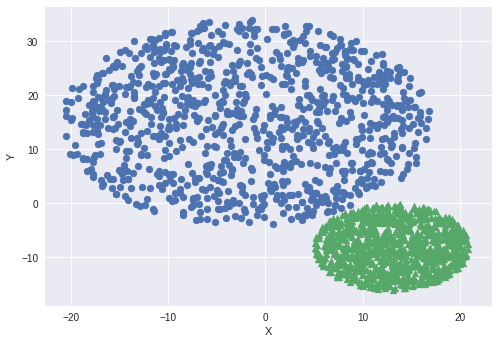

In [41]:
plot_circle_dataset(xa, xb, ya, yb)

The above are just barely linearly separable, let's see how we do! Start by building our dataset

In [8]:
label_a = [0]*len(xa) # Let's say a has target class 0
label_b = [1]*len(xb) # and b target class 1

In [9]:
X = np.r_[np.c_[xa,ya], np.c_[xb, yb]]
y = np.r_[label_a, label_b]

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=14)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
from sklearn.svm import LinearSVC

linear_svc_clf = LinearSVC(dual=False, verbose=2, random_state=14)
linear_svc_clf.fit(X_train_scaled, y_train)

[LibLinear]

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=14, tol=0.0001,
          verbose=2)

In [98]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, color='k'):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

#     svs = svm_clf.support_vectors_
#     plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, color=color, linestyle="-", linewidth=2)
    plt.plot(x0, gutter_up, color=color, linestyle="--", linewidth=2)
    plt.plot(x0, gutter_down, color=color, linestyle="--", linewidth=2)

In [99]:
Xa_train_scaled, ya_train_scaled = np.split(X_train_scaled, 2, axis=1)

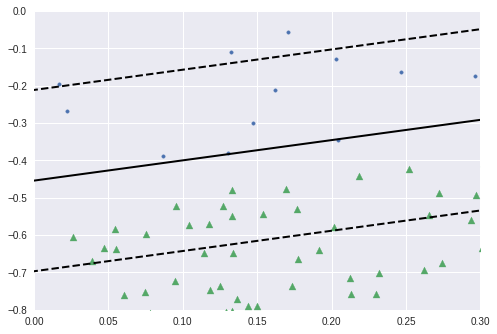

In [100]:
plt.scatter(Xa_train_scaled[y_train==0], ya_train_scaled[y_train==0], marker='.')
plt.scatter(Xa_train_scaled[y_train==1], ya_train_scaled[y_train==1], marker='^')
plot_svc_decision_boundary(linear_svc_clf, -0.5, 0.5)
plt.xlim(-0, 0.3)
plt.ylim(-0.8, 0)
plt.show()

The model did pretty well but it seems that some margin violations have ocurred, let's quantify its score

In [21]:
y_preds = linear_svc_clf.predict(X_test_scaled)

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_scores(y_true, y_preds):
    print(f'------ Model Scores ------')
    print(f'Accuracy: {accuracy_score(y_true, y_preds):.3f}')
    print(f'Precision: {precision_score(y_true, y_preds):.3f}')
    print(f'Recall: {recall_score(y_true, y_preds):.3f}')
    print(f'F1:  {f1_score(y_true, y_preds):.3f}')

In [23]:
print_scores(y_test, y_preds)

------ Model Scores ------
Accuracy: 0.998
Precision: 0.997
Recall: 1.000
F1:  0.998


Now let's compare it against other models

In [92]:
from sklearn.svm import  SVC
from sklearn.linear_model import SGDClassifier

svc_clf = SVC(kernel='linear', random_state=14)
sgd_clf = SGDClassifier()

svc_clf.fit(X_train_scaled, y_train)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [93]:
y_hat_svc = svc_clf.predict(X_test_scaled)
print_scores(y_test, y_hat_svc)

------ Model Scores ------
Accuracy: 0.997
Precision: 0.994
Recall: 1.000
F1:  0.997


In [94]:
y_hat_sgd = sgd_clf.predict(X_test_scaled)
print_scores(y_test, y_hat_sgd)

------ Model Scores ------
Accuracy: 1.000
Precision: 1.000
Recall: 1.000
F1:  1.000


All the models had excellent perfomance with SGD winning overall. Let's make the dataset a little bit more noisy.

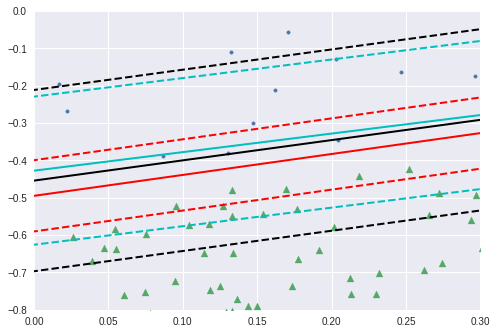

In [101]:
plt.scatter(Xa_train_scaled[y_train==0], ya_train_scaled[y_train==0], marker='.')
plt.scatter(Xa_train_scaled[y_train==1], ya_train_scaled[y_train==1], marker='^')


plot_svc_decision_boundary(linear_svc_clf, -0.5, 0.5, color='k')
plot_svc_decision_boundary(svc_clf, -0.5, 0.5, color='c')
plot_svc_decision_boundary(sgd_clf, -0.5, 0.5, color='r')

plt.xlim(-0, 0.3)
plt.ylim(-0.8, 0)
plt.show()

What if they are linearly separable in 3d space?

In [19]:
def rand_surface(x0, y0, circle_r,  n_samples=1000):
    xs, ys, zs = [], [], []
    while len(xs) < n_samples:
        alpha = 2 * math.pi * np.random.rand()
        # random radius
        r = circle_r * math.sqrt(np.random.rand())
        # calculating coordinates
        x = r * math.cos(alpha) + x0
        y = r * math.sin(alpha) + y0
        
#         x, y = np.random.randint(r/2), np.random.randint(r/2)
        z = x + y - r
        xs.append(x + np.random.rand())
        ys.append(y + np.random.rand())
        zs.append(z + np.random.rand())
    return xs, ys, zs

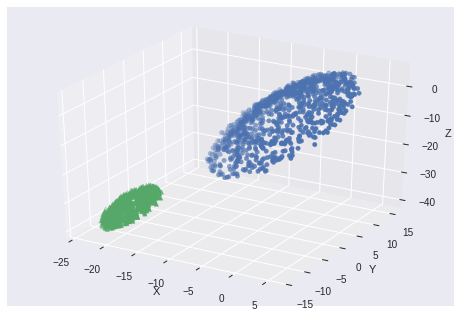

In [21]:
xs, ys, zs = rand_surface(-5, 5, 10)
xs2, ys2, zs2 = rand_surface(-20, -10, 4)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, ys, zs, marker='o')
ax.scatter(xs2, ys2, zs2, marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()